### Installations

In [64]:
# !conda install nltk --yes
# !conda install -c conda-forge wordcloud --yes
# !conda install -c anaconda scikit-learn --yes

In [65]:
import pandas as pd
import numpy as np

In [99]:
data=pd.read_csv("./Restaurant_Reviews.csv")
data.shape

(1000, 2)

## Natural Language Processing(NLP)
 In Python, `re` stands for "Regular Expressions." It is a built-in module that provides support for regular expressions. Regular expressions are powerful tools for pattern matching and text manipulation. The re module allows you to work with regular expressions in Python, enabling you to search for patterns within strings, replace text based on patterns, and more.

#### Here's a brief overview of some commonly used functions and methods in the re module:
1. `re.compile(pattern)`: Compiles a regular expression pattern into a regex object for efficient use in matching and searching.
1. `re.search(pattern, string)`: Searches for the first occurrence of the pattern in the given string and returns a match object if found.
1. `re.match(pattern, string)`: Matches the pattern only at the beginning of the string and returns a match object if it's a match.
1. `re.findall(pattern, string)`: Returns all non-overlapping matches of the pattern in the string as a list of strings.
1. `re.finditer(pattern, string)`: Returns an iterator yielding match objects for all non-overlapping matches of the pattern in the string.
1. `re.sub(pattern, replacement, string)`: Replaces all occurrences of the pattern in the string with the specified replacement.

1. `nltk.download('stopwords')`: This line is used to download the NLTK stopwords dataset. Stopwords are common words (e.g., "the," "and," "in") that are often removed from text during text preprocessing because they don't usually carry significant meaning in text analysis. This download makes sure you have the stopwords dataset available for your NLP tasks.
1. `from nltk.corpus import stopwords` : import that stopword dataset
1. `from nltk.stem.porter import PorterStemmer`: This import brings in the Porter Stemmer algorithm from NLTK. A stemmer is used in NLP to reduce words to their root or base form. The Porter Stemmer is a popular algorithm for stemming words, which means it removes suffixes from words to convert them to their base form. For example, "running" becomes "run," and "jumps" becomes "jump." Stemming can be useful for text normalization in various NLP applications.

In [67]:
import string
import nltk #It is use for Natural language processing
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/animesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1. `review=re.sub(pattern='[^a-zA-Z]', repl=' ', string=data['Review'][i])`: This line uses the `re.sub` function from the `re` module to perform regular expression-based substitution in the text. It replaces any character that is not a letter (a to z, A to Z) with a space. This step effectively removes any non-alphabetical characters from the text.
1. `review=review.lower()`: It converts the entire review text to lowercase.This step ensures that the text is case-insensitive and helps standardize the text for further processing.
1. `review_words=review.split()`: The `split()` method splits the `review` string into a list of words. By default, it splits on whitespace, effectively creating a list of individual words.
1. `review_words=[word for word in review_words if not word in set(stopwords.words('english'))]`: Here, we are using a list comprehension to filter out common English `stopwords` from the `review_words` list. It checks if each word is not in the set of English `stopwords` provided by NLTK's `stopwords.words('english')` and retains only the words that are not `stopwords`.(the,and,in etc.)
1. `ps=PorterStemmer()`: This line creates an instance of the Porter Stemmer from NLTK. The Porter Stemmer is used for word stemming, which reduces words to their base or root form. Stemming helps to group similar words together.
1. `review=[ps.stem(word) for word in review_words]`: Another list comprehension is used here to apply stemming to each word in the `review_words` list using the Porter Stemmer. This replaces each word with its stemmed form.
1. `review=' '.join(review)`: After stemming, the list of words is joined back together into a single string with words separated by spaces.
1. `corpus.append(review)`: Finally, the preprocessed review is added to the corpus list. This list will contain all the preprocessed text reviews from the dataset.

In [95]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [68]:
corpus=[]
for i in range(0,1000):
    review=re.sub(pattern='[^a-zA-Z]',repl=' ',string=data['Review'][i])
    review=review.lower()
    review_words=review.split()
    review_words=[word for word in review_words if not word in set(stopwords.words('english'))]
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review_words]
    review=' '.join(review)
    corpus.append(review)
    

In [69]:
corpus[:15]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair']

### Not necessary  good for visualization of words

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

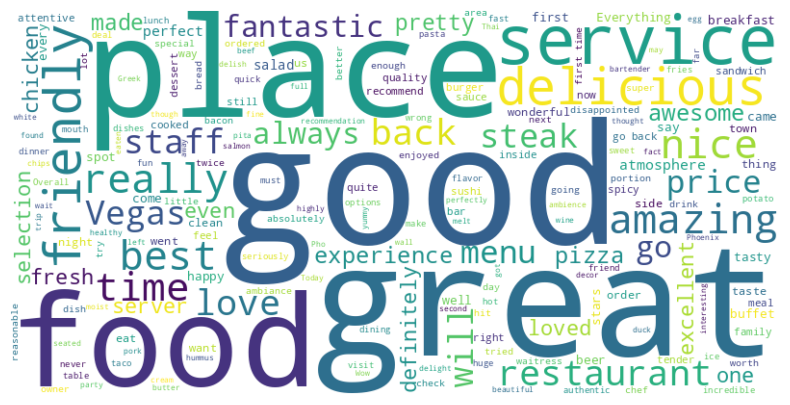

In [71]:
word_cloud=data.loc[data['Liked']==1,:]
text=' '.join([text for text in word_cloud['Review']])
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off') # turns off the axis labels 
plt.show()

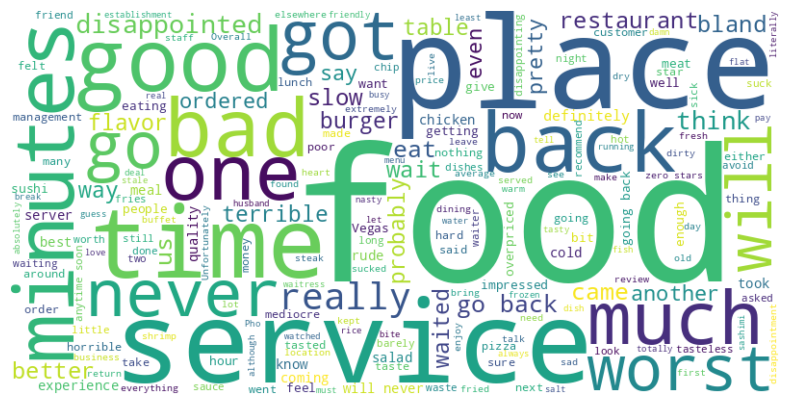

In [72]:
word_cloud=data.loc[data['Liked']==0,:]
text=' '.join([text for text in word_cloud['Review']])
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off') # turns off the axis labels 
plt.show()

### CountVectorizer:

`CountVectorizer` is a text preprocessing technique that is used to convert a collection of text documents into a numerical feature matrix. It works by counting the number of times each word (or term) appears in the text and representing this information as a matrix.

#### Here are some key points about CountVectorizer:

1. `Tokenization`: It tokenizes the text, which means it breaks the text down into individual words or terms.

1. `Vocabulary Building`: It builds a vocabulary of all the unique words (terms) in the text corpus. Each word becomes a feature, and the position (column) of the word in the feature matrix represents that word.

1. `Counting`: For each document in the corpus, it counts how many times each word from the vocabulary appears in that document.

1. `Sparse Matrix`: The result is a sparse matrix where each row corresponds to a document, and each column corresponds to a word from the vocabulary. The matrix contains the word counts for each document.

1. `Feature Extraction`: CountVectorizer transforms the text data into a format that can be used as input for machine learning algorithms. This numerical representation allows you to apply various machine learning techniques to text data.

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

1. `vectorizer=CountVectorizer(max_features=1500)`: Here, we are creating an instance of the `CountVectorizer` class and specifying the parameter `max_features=1500`. This parameter limits the number of features (words) that will be included in the feature matrix to the top 1500 most frequent words in the corpus. It's a way to reduce the dimensionality of the feature matrix, which can help manage memory and improve model performance.
1. `x=vectorizer.fit_transform(corpus).toarray()`: This line is where the magic happens:

    - `vectorizer.fit_transform(corpus)` fits the `CountVectorizer` to the corpus (the preprocessed text data we created earlier) and transforms it into a feature matrix. Each row of the matrix corresponds to a document in the corpus, and each column represents a word from the vocabulary.
    - `.toarray()` converts the resulting sparse matrix into a dense NumPy array. This is done because many machine learning algorithms prefer or require dense arrays as input.
1. `y=data.iloc[:,1].values`: This line is used to extract the target variable (usually labels or classes) from the dataset stored in the DataFrame data. Specifically:
    - `data.iloc[:,1]` extracts all rows from the second column(Liked) of the DataFrame (Python uses 0-based indexing, so the second column is indexed as 1).
    - `.values` converts the selected column into a `NumPy` array. This is commonly done to ensure that y is a NumPy array that can be used as the target variable for machine learning models.<br>

This code cell is preparing the text data for machine learning by using `CountVectorizer` to convert the text corpus into a feature matrix `x`. It also extracts the target variable `y` from the dataset. This is a typical setup for `supervised machine learning` tasks where we have text data and corresponding labels or classes that we want to use to train a predictive model.

In [ ]:
vectorizer=CountVectorizer(max_features=1500)
x=vectorizer.fit_transform(corpus).toarray()
y=data.iloc[:,1].values

In [104]:
x.shape

(1000, 1500)

- `from sklearn.model_selection import train_test_split`: This line imports the `train_test_split` function from scikit-learn's `model_selection` module. This function is used for splitting a dataset into training and testing subsets.
- `X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)`: This line performs the actual data splitting:

    - `X_train and y_train`: These will be your training data and corresponding labels.

    - `X_test and y_test`: These will be your testing data and corresponding labels.

    - `x` and `y`: These are your original dataset (features in x and labels in y) that you want to split.

    - `test_size=0.2`: This parameter specifies that 20% of your data will be used for testing, and the remaining 80% will be used for training. You can adjust this percentage as needed.

    - `random_state=0`: This parameter ensures that the data split is reproducible. Setting it to a specific value (0 in this case) means that if you run this code multiple times with the same dataset, you'll get the same train/test split each time.
 
 where `x` holds the features, and `y` holds the corresponding target values or labels. The train_test_split function will split these into training and testing sets for your machine learning model.<br>
 More Info:https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

`MultinomialNB` class from scikit-learn's `naive_bayes` module. This class is used for implementing the `Multinomial Naive Bayes algorithm`, which is a probabilistic classification algorithm often used for text classification and other tasks involving discrete data.<br>
link:-https://youtu.be/O2L2Uv9pdDA?si=XsQtnVQ-UD_N8nln

In [76]:
from sklearn.naive_bayes import MultinomialNB

In [77]:
from sklearn.naive_bayes import GaussianNB
gaussNb=GaussianNB()
gaussNb.fit(X_train,y_train)

GaussianNB()

In [78]:
classifier=MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB()

In [79]:
gaussY_pred=gaussNb.predict(X_test)
gaussY_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1])

In [80]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [81]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

`Accuracy`= Number of Correct Predictions / Total Number of Predictions
- `accuracy_score(y_test, y_pred)` computes the accuracy by comparing the true labels (`y_test`) with the predicted labels (`y_pred`). It tells you what proportion of the predictions were correct.<br>

`Precision`: Precision is a measure of how many of the positive predictions made by the model were actually correct
`Precision`= True Positives / `True Positives` + `False Positives`
- `​precision_score(y_test, y_pred)` calculates precision by comparing the true labels (`y_test`) with the predicted labels (`y_pred`). It tells you how precise the model is when it predicts positive outcomes.<br>

`Recall`: Recall (also known as Sensitivity or True Positive Rate) is a measure of how many of the actual positive cases were correctly predicted by the model.
Recall= True Positives / `True Positives` + `False Negatives`
- `recall_score(y_test, y_pred)` computes recall by comparing the true labels (`y_test`) with the predicted labels (`y_pred`). It tells you how well the model captures all positive cases.

Gaussian NB

In [82]:
gaussAccuracy=accuracy_score(y_test,gaussY_pred)
gaussPrecision=precision_score(y_test,gaussY_pred)
gaussRecall=recall_score(y_test,gaussY_pred)
print('-----scores-----')
print('accuracy score {}%'.format(round(gaussAccuracy*100,2)))
print('precision score {}%'.format(round(gaussPrecision*100,2)))
print('recall score {}%'.format(round(gaussRecall*100,2)))

-----scores-----
accuracy score 73.0%
precision score 68.42%
recall score 88.35%


Multinomial NB

In [83]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print('-----scores-----')
print('accuracy score {}%'.format(round(accuracy*100,2)))
print('precision score {}%'.format(round(precision*100,2)))
print('recall score {}%'.format(round(recall*100,2)))


-----scores-----
accuracy score 76.5%
precision score 76.42%
recall score 78.64%


About `confusion_matrix` written in readme

gaussian NB confusion matrix

In [84]:
gaussCM=confusion_matrix(y_test,gaussY_pred)
gaussCM

array([[55, 42],
       [12, 91]])

Multinomial NB confusion matrix

In [85]:
c_m=confusion_matrix(y_test,y_pred)
c_m

array([[72, 25],
       [22, 81]])

Ploting the Confusion matrix using `matplotlib.pyplot` and `seaborn`

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

gaussian NB confusion matrix plot

Text(58.222222222222214, 0.5, 'Actual value')

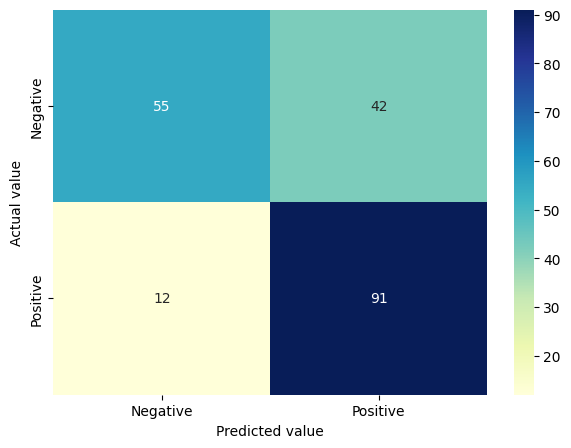

In [87]:
plt.figure(figsize=(7,5))
sns.heatmap(gaussCM,annot=True,cmap='YlGnBu',xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted value')
plt.ylabel('Actual value')

Multinomial NB confusion matrix plot

Text(58.222222222222214, 0.5, 'Actual value')

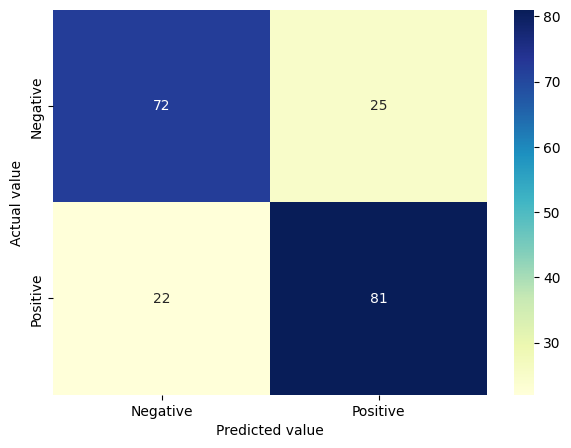

In [88]:
plt.figure(figsize=(7,5))
sns.heatmap(c_m,annot=True,cmap='YlGnBu',xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted value')
plt.ylabel('Actual value')

1. `for i in np.arange(0.01, 1.1, 0.1)`: This loop iterates over a range of alpha values from 0.01 to 1.0 in increments of 0.1. The alpha values are used to control smoothing in the Multinomial Naive Bayes classifier.
1. `temp_cls = MultinomialNB(alpha=i)`: Inside the loop, a new instance of the Multinomial Naive Bayes classifier is created with the current alpha value from the loop.
1. `temp_cls.fit(X_train, y_train)`: The classifier is trained on the training data using the current alpha value.
1. `y_test_pred_h_nbayes = temp_cls.predict(X_test)`: Predictions are made on the test data using the trained classifier with the current alpha.
1. `score = accuracy_score(y_test, y_test_pred_h_nbayes)`: The accuracy score is calculated by comparing the true labels (`y_test`) with the predicted labels (`y_test_pred_h_nbayes`) for the current alpha value.<br>
other things are very simple code if score is greater than best_accuracy change the best_accuracy to score and print the alpha value


In [89]:
# Hyper parameter tuning
best_accuracy=0.0
alpha_value=0

for i in np.arange(0.01,1.1,0.1):
    temp_cls=MultinomialNB(alpha=i)
    temp_cls.fit(X_train,y_train)
    y_test_pred_h_nbayes=temp_cls.predict(X_test)
    score=accuracy_score(y_test,y_test_pred_h_nbayes)
    print("accuracy score for alpha-{} is :{}%".format(round(i,1),round(score*100,2)))
    if score>best_accuracy:
        best_accuracy=score
        alpha_value=i
print('.......................')
print("the best accuracy is: {}% alpha is {}".format(round(best_accuracy*100,2),round(alpha_value,1)))

accuracy score for alpha-0.0 is :76.5%
accuracy score for alpha-0.1 is :78.0%
accuracy score for alpha-0.2 is :78.0%
accuracy score for alpha-0.3 is :78.0%
accuracy score for alpha-0.4 is :78.5%
accuracy score for alpha-0.5 is :77.5%
accuracy score for alpha-0.6 is :77.5%
accuracy score for alpha-0.7 is :77.5%
accuracy score for alpha-0.8 is :77.0%
accuracy score for alpha-0.9 is :76.5%
accuracy score for alpha-1.0 is :76.5%
.......................
the best accuracy is: 78.5% alpha is 0.4


Set the best accuracy alpha value Multinomial NB algo<br>
`Training Process`: The fit method takes your training data and uses it to train the `MultinomialNB` classifier. During this process, the classifier learns the underlying patterns and relationships in the data.

In [90]:
classifier=MultinomialNB(alpha=0.2)
classifier.fit(X_train,y_train)

MultinomialNB(alpha=0.2)

1. `temp = vectorizer.transform([final_review]).toarray()`: vectorizer is a previously trained vectorizer (e.g.,CountVectorizer), this line transforms the processed text (final_review) into a numerical representation, typically a sparse matrix. This numerical representation can be used as input for the machine learning model.

1. `return classifier.predict(temp)`: Finally, the function uses the trained classifier (A Multinomial Naive Bayes classifier, as seen in our previous code) to predict the sentiment of the processed text (temp). It returns the predicted sentiment label, which is typically a binary classification (e.g., positive(1) or negative sentiment(0)).

gauss NB algo to predict the sentiment of the processed text

In [91]:
def gaussPredict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ',string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words=sample_review.split()
    sample_review_words=[word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps=PorterStemmer()
    final_review=[ps.stem(word) for word in sample_review_words]
    final_review=' '.join(final_review)
    # upto this, it just refine the sample review like cut out the punctuation,convert to lower case,convert to root word
    # what ever we done before in NLP
    temp=vectorizer.transform([final_review]).toarray()
    return gaussNb.predict(temp)

multinomial NB algo to predict the sentiment of the processed text

In [92]:
def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ',string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words=sample_review.split()
    sample_review_words=[word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps=PorterStemmer()
    final_review=[ps.stem(word) for word in sample_review_words]
    final_review=' '.join(final_review)
    # upto this, it just refine the sample review like cut out the punctuation,convert to lower case,convert to root word
    # what ever we done before in NLP
    temp=vectorizer.transform([final_review]).toarray()
    return classifier.predict(temp)

`new_review` is unseen review that our ML model will predict the review is positive or negative review

this review "food is good and value for money" is positive review but our model predict it as negative review because in our dataset word "money" is in all negative review so our model predict it as negative review

In [93]:
# new_review = "food is really bad"
# new_review="food is good but not value for money"
new_review="food is good and value for money"
if gaussPredict_sentiment(new_review):
    print("positive review")
else:
    print("negative review")

negative review


In [94]:
# new_review = "food is really bad"
# new_review="food is good but not value for money"
new_review="food is good and worth it"
# new_review="food is very value for money"
if predict_sentiment(new_review):
    print("positive review")
else:
    print("negative review")

positive review


- conclusion: we can say multinomial NB algo is better than gauss NB algo for this dataset still we can improve our model by using different dataset and algorithms